## 04EPPY - Actividad Final

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.


# Star dataset to predict star types

El objetivo es entrenar modelos que puedan clasificar correctamente los tipos de estrellas.

Se trata por tanto de un proyecto de Machine Learning de Aprendizaje Supervisado de Clasificación.


## Leer Dataset
- En Kaggle obtenemos el dataset sobre los tipos de estrellas
  - https://www.kaggle.com/datasets/deepu1109/star-dataset 
- Obtener y leer el fichero csv en dataframes de pandas

In [1]:
import os
from zipfile import ZipFile

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, scale

from mpl_toolkits.mplot3d import Axes3D

In [2]:
with ZipFile('archive.zip', 'r') as zip_file:
    zip_file.extractall('res')
    print('Se ha creado una carpeta "res" con el archivo descargado de Kaggle.')

file_oldname = os.path.join('res', '6 class csv.csv')
file_newname = os.path.join('res', 'stars.csv')

os.rename(file_oldname, file_newname)
print('Se ha modificado el nombre del fichero.')


Se ha creado una carpeta "res" con el archivo descargado de Kaggle.
Se ha modificado el nombre del fichero.


In [3]:
stars_csv = os.path.join('res', 'stars.csv')
stars_data = pd.read_csv(stars_csv, engine='python')

display(stars_data)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [4]:
stars_data.info()
# No hay NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
stars_data.describe(include='all')

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240,240
unique,NaN,NaN,NaN,NaN,NaN,19,7
top,NaN,NaN,NaN,NaN,NaN,Red,M
freq,NaN,NaN,NaN,NaN,NaN,112,111
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,NaN,NaN
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,NaN,NaN
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,NaN,NaN
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,NaN,NaN
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,NaN,NaN
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,NaN,NaN


array([[<AxesSubplot:title={'center':'Temperature (K)'}>,
        <AxesSubplot:title={'center':'Luminosity(L/Lo)'}>],
       [<AxesSubplot:title={'center':'Radius(R/Ro)'}>,
        <AxesSubplot:title={'center':'Absolute magnitude(Mv)'}>],
       [<AxesSubplot:title={'center':'Star type'}>, <AxesSubplot:>]],
      dtype=object)

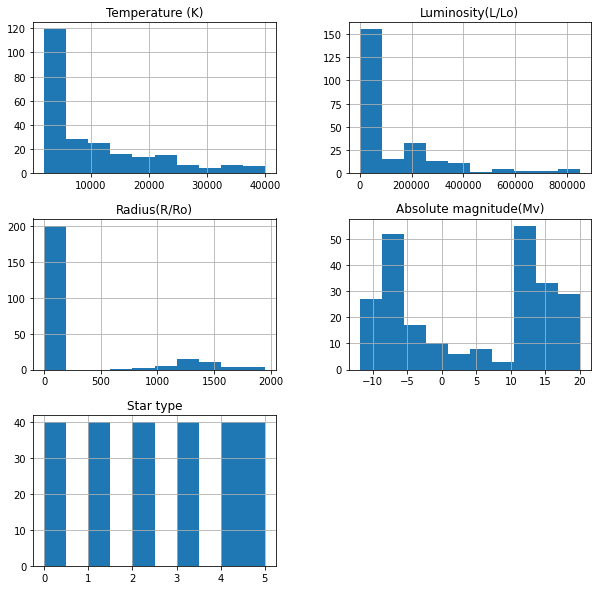

In [6]:
stars_data.hist(figsize=(10, 10))
# Las clases de estrellas están balanceadas


#### Ver relación entre tipos de estrellas y algunas de sus características

<AxesSubplot:xlabel='Star type', ylabel='Luminosity(L/Lo)'>

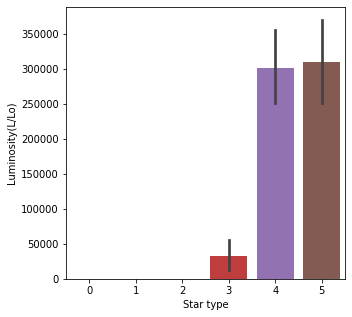

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x='Star type', y='Luminosity(L/Lo)', data=stars_data)


<AxesSubplot:xlabel='Star type', ylabel='Temperature (K)'>

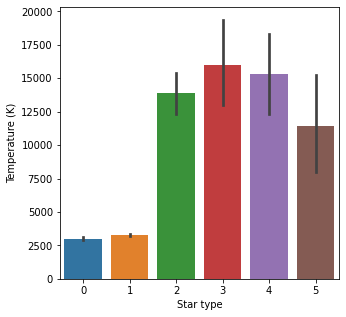

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='Star type', y='Temperature (K)', data=stars_data)


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Temperature (K)'>

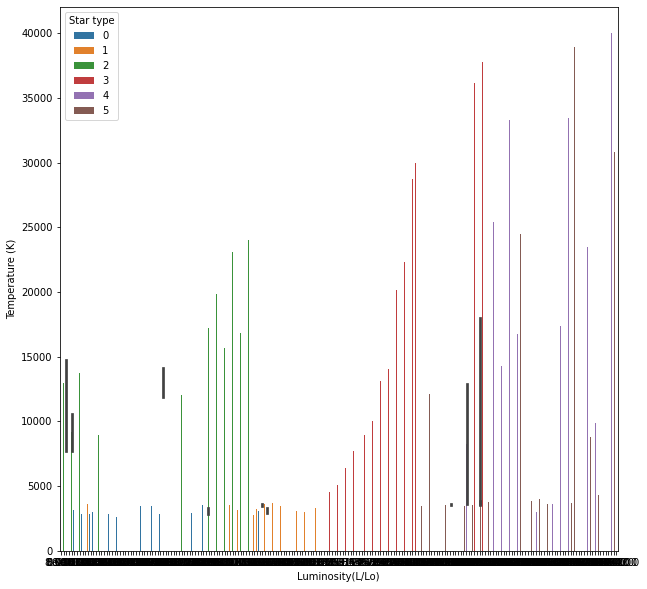

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(hue='Star type', x='Luminosity(L/Lo)', y='Temperature (K)', data=stars_data)


#### Modelo los datos de 'Star color' y 'Spectral Class' y cambio 'Temperature' a float

In [10]:
le = LabelEncoder()
le.fit(stars_data['Star color'])
stars_data['Star color'] = le.transform(stars_data['Star color'])

le.fit(stars_data['Spectral Class'])
stars_data['Spectral Class'] = le.transform(stars_data['Spectral Class'])

stars_data['Temperature (K)'] = stars_data['Temperature (K)'].apply(lambda x: float(x))

display(stars_data)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068.0,0.002400,0.1700,16.12,0,10,5
1,3042.0,0.000500,0.1542,16.60,0,10,5
2,2600.0,0.000300,0.1020,18.70,0,10,5
3,2800.0,0.000200,0.1600,16.65,0,10,5
4,1939.0,0.000138,0.1030,20.06,0,10,5
...,...,...,...,...,...,...,...
235,38940.0,374830.000000,1356.0000,-9.93,5,0,6
236,30839.0,834042.000000,1194.0000,-10.63,5,0,6
237,8829.0,537493.000000,1423.0000,-10.73,5,11,0
238,9235.0,404940.000000,1112.0000,-11.23,5,11,0


In [11]:
stars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    float64
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int32  
 6   Spectral Class          240 non-null    int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 11.4 KB


#### Gráficos de correlaciones

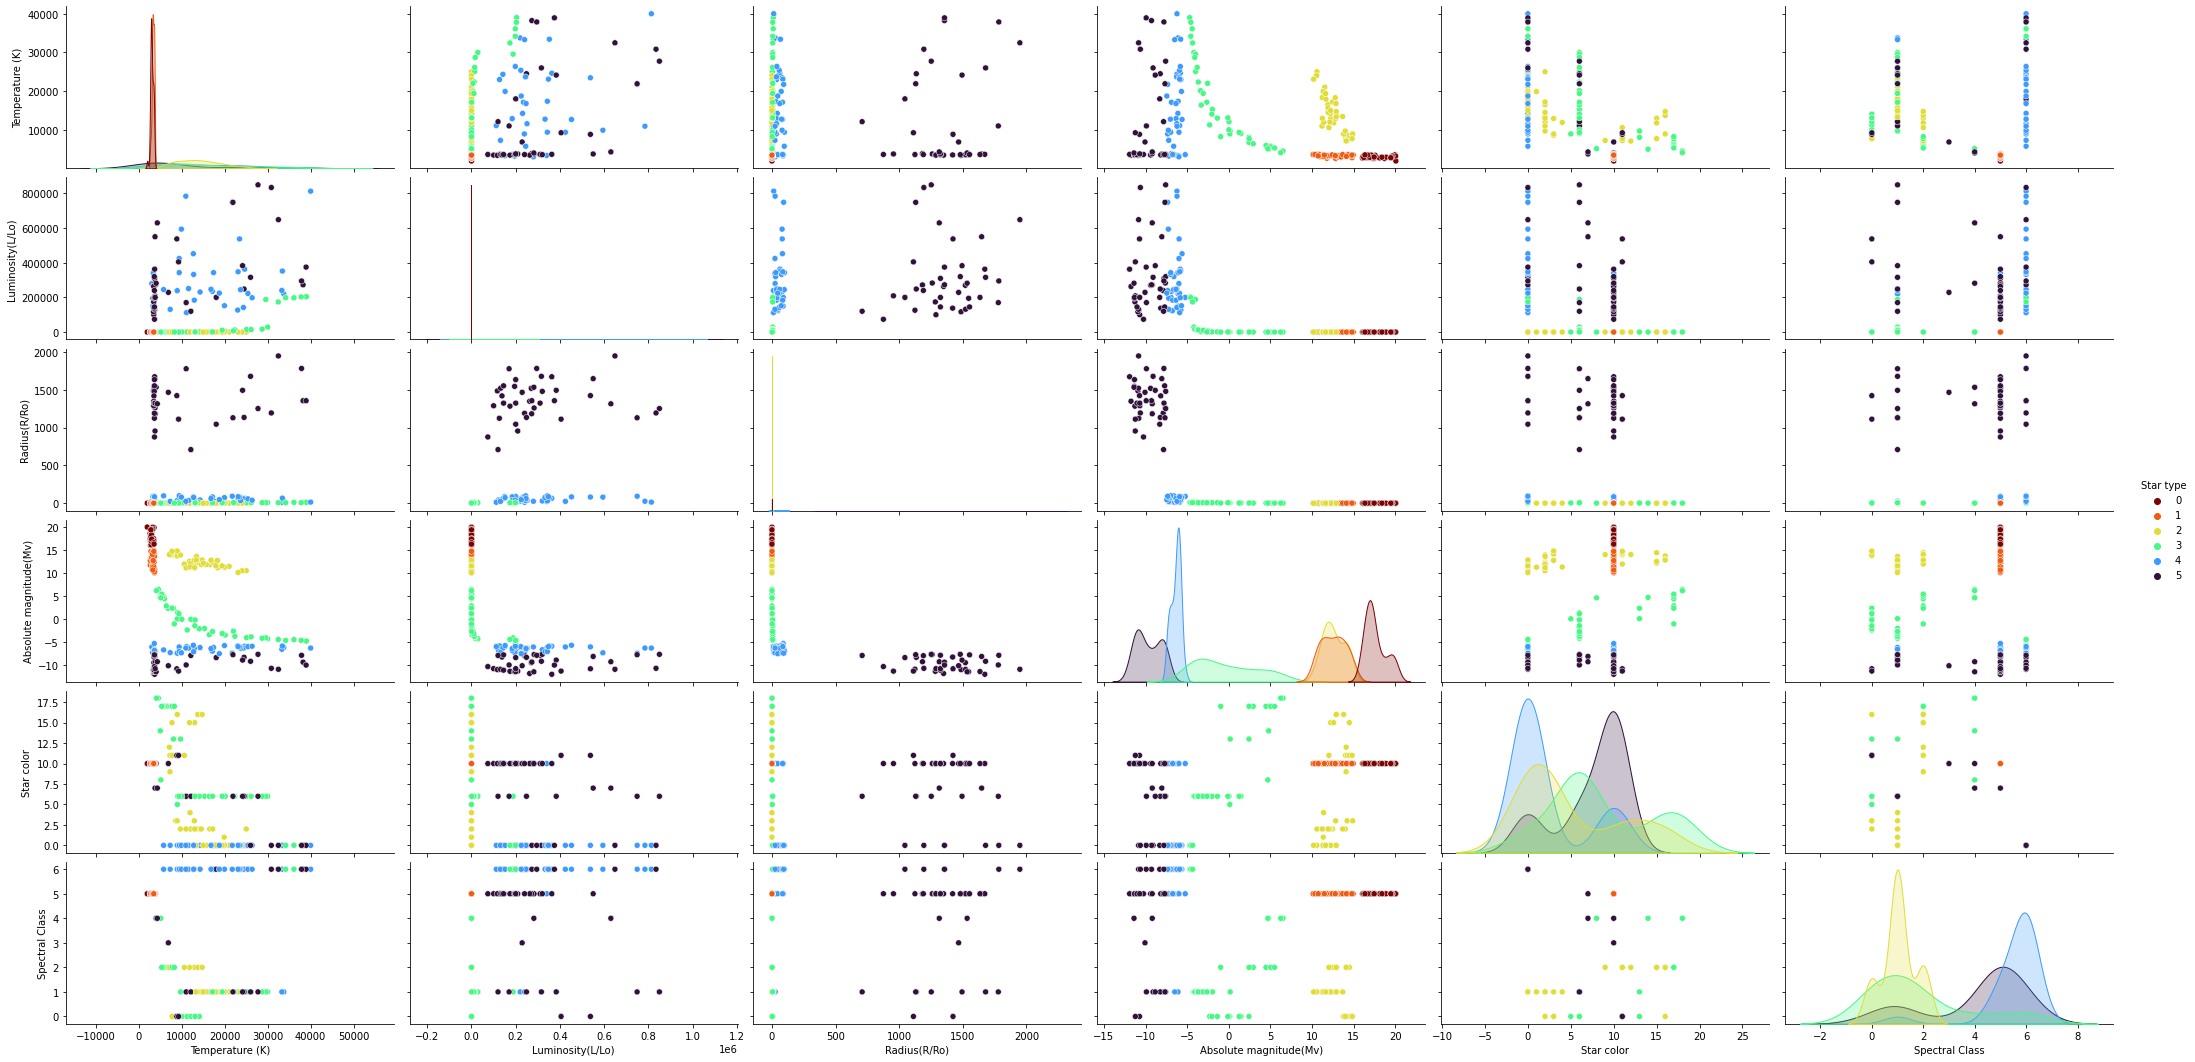

In [12]:
sns.pairplot(data=stars_data, hue='Star type', palette='turbo_r', aspect=2)


#### Standarizar / escalar los datos

In [13]:
stars_no_type = stars_data.drop('Star type', axis=1)

data_scaled = StandardScaler()
data_scaled.fit(stars_no_type)
scaled = data_scaled.transform(stars_no_type)

columns = list(stars_no_type.columns.values)
scaled_df = pd.DataFrame(scaled, columns=columns)

stars_data_scaled = scaled_df.join(stars_data['Star type'], how='inner')
display(stars_data_scaled)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,-0.779382,-0.598624,-0.459210,1.116745,0.559354,0.595338,0
1,-0.782110,-0.598624,-0.459241,1.162414,0.559354,0.595338,0
2,-0.828477,-0.598624,-0.459342,1.362213,0.559354,0.595338,0
3,-0.807496,-0.598624,-0.459229,1.167171,0.559354,0.595338,0
4,-0.897819,-0.598624,-0.459340,1.491607,0.559354,0.595338,0
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,-1.474661,1.074805,5
236,2.133913,4.059319,1.854068,-1.428317,-1.474661,1.074805,5
237,-0.175029,2.403157,2.297800,-1.437832,0.762756,-1.801997,5
238,-0.132438,1.662878,1.695177,-1.485403,0.762756,-1.801997,5


#### Ver relación entre características de estrellas según su clase

<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Temperature (K)'>

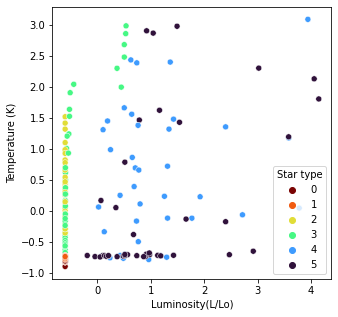

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=stars_data_scaled, x='Luminosity(L/Lo)', y='Temperature (K)', hue='Star type', palette='turbo_r')


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Temperature (K)'>

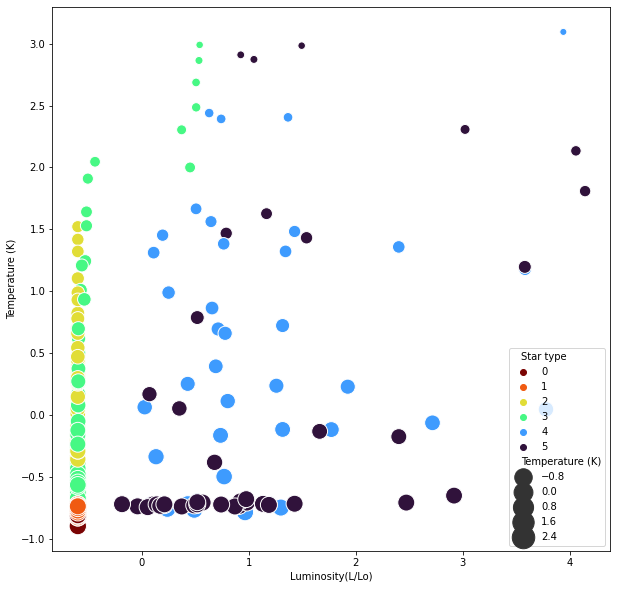

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=stars_data_scaled, x='Luminosity(L/Lo)', y='Temperature (K)', hue='Star type', palette='turbo_r',
                size='Temperature (K)', sizes=(300, 50))


<AxesSubplot:xlabel='Luminosity(L/Lo)', ylabel='Temperature (K)'>

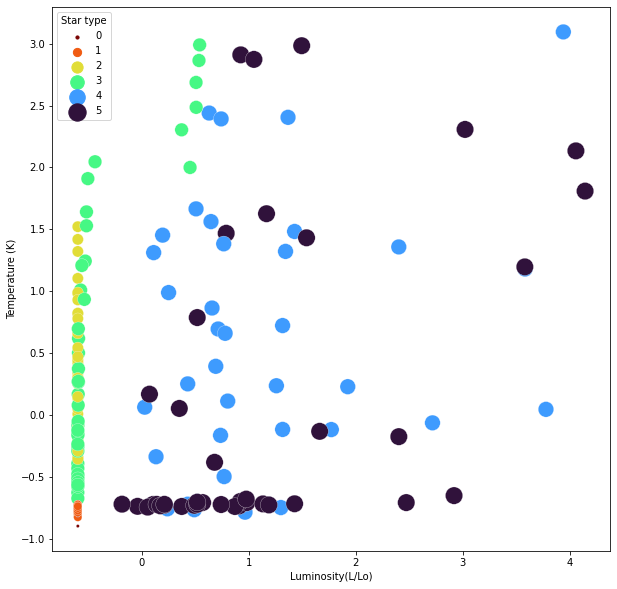

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=stars_data_scaled, x='Luminosity(L/Lo)', y='Temperature (K)', hue='Star type', palette='turbo_r',
                size='Star type', sizes=(10, 300))


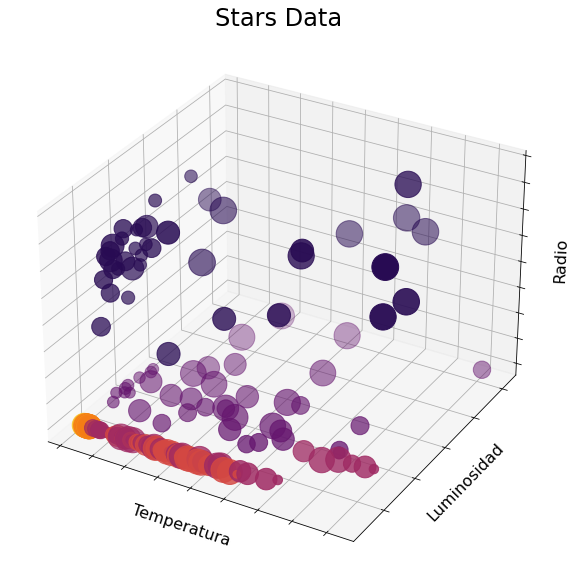

In [17]:
color_labels = stars_data_scaled['Star type'].unique()
rgb_values = sns.color_palette("inferno_r", 6)
color_map = dict(zip(color_labels, rgb_values))
tamanyo_punto = [3*n for n in range(len(stars_data_scaled['Radius(R/Ro)']))]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(stars_data_scaled['Temperature (K)'],
           stars_data_scaled['Luminosity(L/Lo)'],
           stars_data_scaled['Radius(R/Ro)'],
           c=stars_data_scaled['Star type'].map(color_map),
           s=tamanyo_punto)
ax.set_title('Stars Data', size=24)
ax.set_xlabel('Temperatura', size=16)
ax.set_ylabel('Luminosidad', size=16)
ax.set_zlabel('Radio', size=16)
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())
plt.show()


## Empezamos con el análisis de datos

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD

from numpy import set_printoptions
from numpy import argmax


#### Creo una copia de los datos

In [19]:
data = stars_data_scaled.copy()
display(data)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,-0.779382,-0.598624,-0.459210,1.116745,0.559354,0.595338,0
1,-0.782110,-0.598624,-0.459241,1.162414,0.559354,0.595338,0
2,-0.828477,-0.598624,-0.459342,1.362213,0.559354,0.595338,0
3,-0.807496,-0.598624,-0.459229,1.167171,0.559354,0.595338,0
4,-0.897819,-0.598624,-0.459340,1.491607,0.559354,0.595338,0
...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,-1.474661,1.074805,5
236,2.133913,4.059319,1.854068,-1.428317,-1.474661,1.074805,5
237,-0.175029,2.403157,2.297800,-1.437832,0.762756,-1.801997,5
238,-0.132438,1.662878,1.695177,-1.485403,0.762756,-1.801997,5


#### Separo los datos de las etiquetas y divido en train/test

In [20]:
x = data.drop(['Star type'], axis=1)
y = data['Star type']

test_split = 0.2
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split, random_state=seed, stratify=y)
# stratify en realidad no es necesario en este ejemplo porque las clases de estrella están balanceadas
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


### Instancio el modelo de KNN y lo entreno

Compruebo cual es el mejor KNN

In [21]:
total_scores = []
total_range = list(range(1, 51))
for _knn in total_range:
    knn = KNeighborsClassifier(n_neighbors=_knn)
    knn.fit(x_train, y_train)
    knn.predict(x_test)
    score = knn.score(x_test, y_test)
    total_scores.append(score)

# print(total_scores)


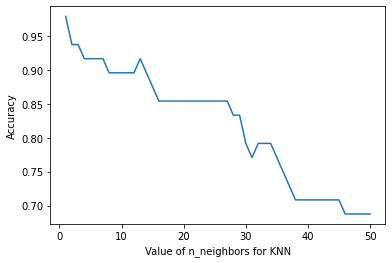

In [22]:
fig, ax = plt.subplots()
ax.plot(total_range, total_scores)
ax.set_xlabel('Value of n_neighbors for KNN')
ax.set_ylabel('Accuracy')
plt.show()


Cuanto mayor es el 'n_neighbors' peor funciona el modelo.

Elijo 'knn=10' porque pienso que es un valor "estable" para obtener resultados razonables, con accuracy superior al 85%.

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)

print('KNN Acurracy:  ', accuracy_score(y_test, knn_y_pred).round(4))
print('KNN Precision: ', precision_score(y_test, knn_y_pred, average = 'micro').round(4))
print('KNN Recall:    ', recall_score(y_test, knn_y_pred, average='micro').round(4))
print('KNN ROC_AUC:   ', roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr').round(4))

confusion = confusion_matrix(y_test, knn_y_pred)
knn_confusion_matrix_df = pd.DataFrame(confusion,
                  columns=['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'],
                  index=['real_0', 'real_1', 'real_2', 'real_3', 'real_4', 'real_5'])

print('\nMatriz de confusión KNN:')
display(knn_confusion_matrix_df)

# print('Pred:', list(knn.predict(x_test))[0:20])
# print('Real:', list(y_test.astype(int))[0:20])

KNN Acurracy:   0.8958
KNN Precision:  0.8958
KNN Recall:     0.8958
KNN ROC_AUC:    0.9917

Matriz de confusión KNN:


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
real_0,8,0,0,0,0,0
real_1,0,8,0,0,0,0
real_2,0,0,8,0,0,0
real_3,0,1,0,5,2,0
real_4,0,0,0,1,7,0
real_5,0,0,0,0,1,7


Con la matriz de confusión podemos ver que el modelo:
   - Predice correctamente el 100%  de las clases 0-1-2
   - Predice correctamente el 87.5% de las clases 4-5
   - Predice correctamente el 62.5% de la clase 3

In [24]:
print(5/8)
print(7/8)

0.625
0.875


### KNN con Grid SearchCV


In [25]:
knn_grid = KNeighborsClassifier(n_neighbors=10)
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=total_range, weights=weight_options)
# print(param_grid)
grid = GridSearchCV(knn_grid, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(x, y)
# pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

print('KNN Grid Search Best Score: ', grid.best_score_)
print('KNN Grid Search Best Params:', grid.best_params_)


KNN Grid Search Best Score:  0.975
KNN Grid Search Best Params: {'n_neighbors': 1, 'weights': 'uniform'}


### KNN con Randomized SearchCV


In [26]:
knn_rand = KNeighborsClassifier(n_neighbors=10)
rand = RandomizedSearchCV(knn_rand, param_grid, cv=10,
                          scoring='accuracy', n_iter=10, random_state=seed)
rand.fit(x, y)
# pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

print('KNN Randomized Search Best Score: ', rand.best_score_)
print('KNN Randomized Search Best Params:', rand.best_params_)


KNN Randomized Search Best Score:  0.975
KNN Randomized Search Best Params: {'weights': 'uniform', 'n_neighbors': 1}


### Instancio el modelo de Decision Tree Classifier y lo entreno

Compruebo cual es la mejor max_depth

In [27]:
total_scores = []
total_range = list(range(1, 10))
for _depth in total_range:
    dtr = DecisionTreeClassifier(max_depth=_depth, random_state=seed)
    dtr.fit(x_train, y_train)
    dtr.predict(x_test)
    score = dtr.score(x_test, y_test)
    total_scores.append(score)

# print(total_scores)


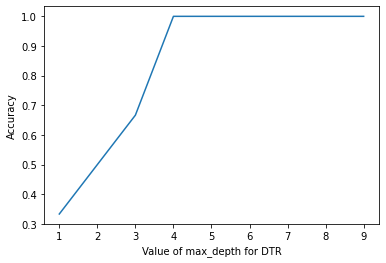

In [28]:
fig, ax = plt.subplots()
ax.plot(total_range, total_scores)
ax.set_xlabel('Value of max_depth for DTR')
ax.set_ylabel('Accuracy')
plt.show()


Parece que a partir de 4 predice siempre bien.

In [29]:
dtr = DecisionTreeClassifier(max_depth=4, random_state=seed)
dtr.fit(x_train, y_train)
dtr_y_pred = dtr.predict(x_test)

print('Decision Tree Classifier Acurracy:  ', accuracy_score(y_test, dtr_y_pred).round(4))
print('Decision Tree Classifier Precision: ', precision_score(y_test, dtr_y_pred, average='micro').round(4))
print('Decision Tree Classifier Recall:    ', recall_score(y_test, dtr_y_pred, average='micro').round(4))
print('Decision Tree Classifier ROC_AUC:   ', roc_auc_score(y_test, dtr.predict_proba(x_test), multi_class='ovr').round(4))

confusion = confusion_matrix(y_test, dtr_y_pred)
dtr_confusion_matrix_df = pd.DataFrame(confusion,
                                       columns=['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'],
                                       index=['real_0', 'real_1', 'real_2', 'real_3', 'real_4', 'real_5'])

print('\nMatriz de confusión de Árbol de Decisión:')
display(dtr_confusion_matrix_df)

# print('Pred:', list(dtr.predict(x_test))[0:20])
# print('Real:', list(y_test.astype(int))[0:20])


Decision Tree Classifier Acurracy:   1.0
Decision Tree Classifier Precision:  1.0
Decision Tree Classifier Recall:     1.0
Decision Tree Classifier ROC_AUC:    1.0

Matriz de confusión de Árbol de Decisión:


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
real_0,8,0,0,0,0,0
real_1,0,8,0,0,0,0
real_2,0,0,8,0,0,0
real_3,0,0,0,8,0,0
real_4,0,0,0,0,8,0
real_5,0,0,0,0,0,8


El modelo de Árbol de Decisión clasifica correctamente todas las estrellas

[Text(0.25, 0.9, 'X[3] <= -1.132\ngini = 0.833\nsamples = 192\nvalue = [32, 32, 32, 32, 32, 32]\nclass = y[0]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 0, 32]\nclass = y[5]'),
 Text(0.375, 0.7, 'X[3] <= -0.883\ngini = 0.8\nsamples = 160\nvalue = [32, 32, 32, 32, 32, 0]\nclass = y[0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 0, 32, 0]\nclass = y[4]'),
 Text(0.5, 0.5, 'X[0] <= -0.694\ngini = 0.75\nsamples = 128\nvalue = [32, 32, 32, 32, 0, 0]\nclass = y[0]'),
 Text(0.25, 0.3, 'X[3] <= 1.057\ngini = 0.5\nsamples = 64\nvalue = [32, 32, 0, 0, 0, 0]\nclass = y[0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0, 0, 0, 0]\nclass = y[1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0, 0, 0, 0]\nclass = y[0]'),
 Text(0.75, 0.3, 'X[3] <= 0.377\ngini = 0.5\nsamples = 64\nvalue = [0, 0, 32, 32, 0, 0]\nclass = y[2]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 0, 32, 0, 0]\nclass = y[3]'),
 Text(0.

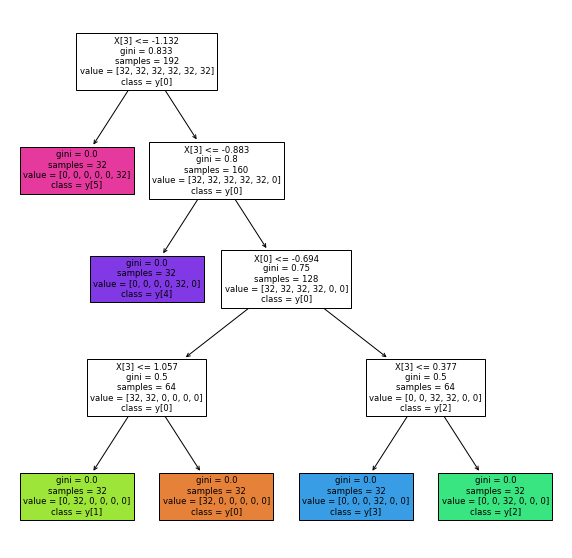

In [30]:
plt.figure(figsize=(10, 10))
plot_tree(dtr, class_names=True, filled=True)


### Instancio el modelo de Regresión Logística y lo entreno

In [31]:
logreg = LogisticRegression(random_state=seed, solver='lbfgs')
logreg.fit(x_train, y_train)
logreg_y_pred = logreg.predict(x_test)

print('Logistic Regression Acurracy:  ', accuracy_score(y_test, logreg_y_pred).round(4))
print('Logistic Regression Precision: ', precision_score(y_test, logreg_y_pred, average='micro').round(4))
print('Logistic Regression Recall:    ', recall_score(y_test, logreg_y_pred, average='micro').round(4))
print('Logistic Regression ROC_AUC:   ', roc_auc_score(y_test, logreg.predict_proba(x_test), multi_class='ovr').round(4))

confusion = confusion_matrix(y_test, logreg_y_pred)
logreg_confusion_matrix_df = pd.DataFrame(confusion,
                                       columns=['pred_0', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'],
                                       index=['real_0', 'real_1', 'real_2', 'real_3', 'real_4', 'real_5'])
print('\nMatriz de confusión de Regresión Logística:')
display(logreg_confusion_matrix_df)

# print('Pred:', list(logreg.predict(x_test))[0:20])
# print('Real:', list(y_test.astype(int))[0:20])


Logistic Regression Acurracy:   0.9167
Logistic Regression Precision:  0.9167
Logistic Regression Recall:     0.9167
Logistic Regression ROC_AUC:    0.9958

Matriz de confusión de Regresión Logística:


,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5
real_0,8,0,0,0,0,0
real_1,2,6,0,0,0,0
real_2,0,0,8,0,0,0
real_3,0,0,0,7,1,0
real_4,0,0,0,1,7,0
real_5,0,0,0,0,0,8


Con la matriz de confusión podemos ver que el modelo:
   - Predice correctamente el 100% de las clases 0-2-5
   - Predice correctamente el 87.5% de las clases 3-4
   - Predice correctamente el 75% de la clase 1

In [32]:
print(6/8)
print(7/8)

0.75
0.875


### Cross-Validation


In [33]:
knn_cv = KNeighborsClassifier(n_neighbors=10)
dtr_cv = DecisionTreeClassifier(max_depth=4, random_state=seed)
logreg_cv = LogisticRegression(random_state=seed)

print(cross_val_score(knn_cv, x, y, cv=10, scoring='accuracy').mean().round(4))
print(cross_val_score(dtr_cv, x, y, cv=10, scoring='accuracy').mean().round(4))
print(cross_val_score(logreg_cv, x, y, cv=10, scoring='accuracy').mean().round(4))


0.95
0.9958
0.9708


In [34]:
knn_grid_cv = KNeighborsClassifier(n_neighbors=10)
grid_cv = GridSearchCV(knn_grid_cv, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

print(cross_val_score(grid_cv, x, y, cv=10, scoring='accuracy').mean().round(4))


0.975


In [35]:
knn_rand_cv = KNeighborsClassifier(n_neighbors=10)
rand_cv = RandomizedSearchCV(knn_rand_cv, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=seed)

print(cross_val_score(rand_cv, x, y, cv=10, scoring='accuracy').mean().round(4))


0.975


### Red Neuronal a base de Capas Dense

#### Modelo 1

In [36]:
n_features = x_train.shape[1:]

# Definir el modelo
model_1 = Sequential(name='Red_Neuronal_1')
model_1.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features), name='Capa_1'))
model_1.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='Capa_2'))
model_1.add(Dense(6, activation='softmax', name='Capa_3'))
# Última capa con 6 nodos porque sabemos que son 6 clases

# Compilar el modelo
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 250
model_1.fit(x_train, y_train, epochs=epochs, batch_size=25, verbose=1)

# Evaluar el modelo
loss, acc = model_1.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {acc:.3f}')

# Hacer predicciones (datos copiados fila 0 del dataframe) 
row = data.iloc[0, :-1].tolist()
y_pred = model_1.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')

# Guardar el modelo
model_1.save(os.path.join('res', 'model_1.h5'))


Epoch 1/250
8/8 [==============================] - 1s 2ms/step - loss: 3.0659 - accuracy: 0.1667
Epoch 2/250
8/8 [==============================] - 0s 2ms/step - loss: 2.9086 - accuracy: 0.1667
Epoch 3/250
8/8 [==============================] - 0s 2ms/step - loss: 2.7649 - accuracy: 0.1667
Epoch 4/250
8/8 [==============================] - 0s 2ms/step - loss: 2.6320 - accuracy: 0.1667
Epoch 5/250
8/8 [==============================] - 0s 2ms/step - loss: 2.5233 - accuracy: 0.1823
Epoch 6/250
8/8 [==============================] - 0s 2ms/step - loss: 2.4114 - accuracy: 0.1979
Epoch 7/250
8/8 [==============================] - 0s 2ms/step - loss: 2.3133 - accuracy: 0.2448
Epoch 8/250
8/8 [==============================] - 0s 2ms/step - loss: 2.2232 - accuracy: 0.2604
Epoch 9/250
8/8 [==============================] - 0s 2ms/step - loss: 2.1387 - accuracy: 0.2708
Epoch 10/250
8/8 [==============================] - 0s 2ms/step - loss: 2.0598 - accuracy: 0.2917
Epoch 11/250
8/8 [===========

##### Visualización del modelo


In [37]:
model_1.summary()


Model: "Red_Neuronal_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_1 (Dense)              (None, 10)                70        
                                                                 
 Capa_2 (Dense)              (None, 8)                 88        
                                                                 
 Capa_3 (Dense)              (None, 6)                 54        
                                                                 
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


#### Modelo 2

In [38]:
n_features = x_train.shape[1:]

# Definir el modelo
model_2 = Sequential(name='Red_Neuronal_2')
model_2.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features), name='Capa_1'))
model_2.add(Dropout(0.1, name='Corte_1'))
model_2.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='Capa_2'))
model_2.add(Dropout(0.1, name='Corte_2'))
model_2.add(Dense(6, activation='softmax', name='Capa_3'))
# Última capa con 6 nodos porque sabemos que son 6 clases

# Compilar el modelo
sgd = SGD(learning_rate=0.001, momentum=0.8)
model_2.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 500
history = model_2.fit(x_train, y_train, epochs=epochs, batch_size=25, verbose=0, validation_split=0.3)

# Evaluar el modelo
loss, acc = model_2.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {acc:.3f}')

# Hacer predicciones (datos copiados fila 0 del dataframe)
row = data.iloc[0, :-1].tolist()
y_pred = model_2.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')

# Guardar el modelo
model_2.save(os.path.join('res', 'model_2.h5'))



Test Accuracy: 0.875
1/1 [==============================] - 0s 79ms/step
Predicted: [[5.802e-01 4.036e-01 7.505e-03 4.406e-04 5.692e-03 2.572e-03]] (class=0)


##### Curva de aprendizaje

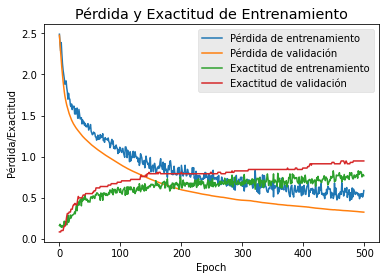

In [39]:
fig, ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(epochs))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')
ax.plot(epoch_values, history.history['accuracy'], label='Exactitud de entrenamiento')
ax.plot(epoch_values, history.history['val_accuracy'], label='Exactitud de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()


#### Modelo 3

In [40]:
n_features = x_train.shape[1:]

# Definir el modelo
model_3 = Sequential(name='Red_Neuronal_3')
model_3.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features), name='Capa_1'))
model_3.add(Dropout(0.1, name='Corte_1'))
model_3.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='Capa_2'))
model_3.add(Dropout(0.1, name='Corte_2'))
model_3.add(Dense(6, activation='softmax', name='Capa_3'))
# Última capa con 6 nodos porque sabemos que son 6 clases

# Compilar el modelo
sgd = SGD(learning_rate=0.001, momentum=0.8)
model_3.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 300
history = model_3.fit(x_train, y_train, epochs=epochs, batch_size=25, verbose=0, validation_split=0.3)

# Evaluar el modelo
loss, acc = model_3.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {acc:.3f}')

# Hacer predicciones (datos copiados fila 0 del dataframe)
row = data.iloc[0, :-1].tolist()
y_pred = model_3.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')

# Guardar el modelo
model_3.save(os.path.join('res', 'model_3.h5'))



Test Accuracy: 0.604
1/1 [==============================] - 0s 80ms/step
Predicted: [[0.549 0.387 0.012 0.04  0.005 0.008]] (class=0)


##### Curva de aprendizaje

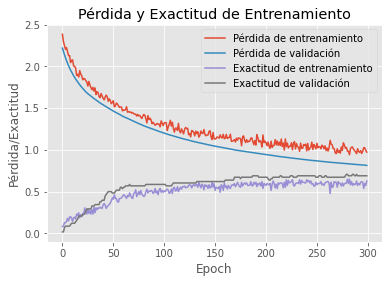

In [41]:
fig, ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(epochs))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')
ax.plot(epoch_values, history.history['accuracy'], label='Exactitud de entrenamiento')
ax.plot(epoch_values, history.history['val_accuracy'], label='Exactitud de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()


#### Modelo 4

In [42]:
n_features = x_train.shape[1:]

# Definir el modelo
model_4 = Sequential(name='Red_Neuronal_4')
model_4.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features), name='Capa_1'))
model_4.add(BatchNormalization())
model_4.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='Capa_2'))
model_4.add(Dropout(0.1, name='Corte_2'))
model_4.add(Dense(6, activation='softmax', name='Capa_3'))
# Última capa con 6 nodos porque sabemos que son 6 clases

# Compilar el modelo
sgd = SGD(learning_rate=0.001, momentum=0.8)
model_4.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
epochs = 300
history = model_4.fit(x_train, y_train, epochs=epochs, batch_size=25, verbose=0, validation_split=0.3)

# Evaluar el modelo
loss, acc = model_4.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {acc:.3f}')

# Hacer predicciones (datos copiados fila 0 del dataframe)
row = data.iloc[0, :-1].tolist()
y_pred = model_4.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')

# Guardar el modelo
model_4.save(os.path.join('res', 'model_4.h5'))


Test Accuracy: 0.896
1/1 [==============================] - 0s 115ms/step
Predicted: [[0.842 0.13  0.01  0.007 0.007 0.004]] (class=0)


##### Visualización del modelo


In [43]:
model_4.summary()

Model: "Red_Neuronal_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_1 (Dense)              (None, 10)                70        
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 Capa_2 (Dense)              (None, 8)                 88        
                                                                 
 Corte_2 (Dropout)           (None, 8)                 0         
                                                                 
 Capa_3 (Dense)              (None, 6)                 54        
                                                                 
Total params: 252
Trainable params: 232
Non-trainable params: 20
_____________________________________________________

#### Modelo 5

In [44]:
n_features = x_train.shape[1:]

# Definir el modelo
model_5 = Sequential(name='Red_Neuronal_5')
model_5.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features), name='Capa_1'))
model_5.add(BatchNormalization())
model_5.add(Dense(8, activation='relu', kernel_initializer='he_normal', name='Capa_2'))
model_5.add(Dropout(0.1, name='Corte_2'))
model_5.add(Dense(6, activation='softmax', name='Capa_3'))
# Última capa con 6 nodos porque sabemos que son 6 clases

# Compilar el modelo
sgd = SGD(learning_rate=0.001, momentum=0.8)
model_5.compile(
    optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Configurar Early Stopping
es = EarlyStopping(monitor='val_loss', patience=5)

# Entrenar el modelo
epochs = 300
history = model_5.fit(x_train, y_train, epochs=epochs, batch_size=25, verbose=0, validation_split=0.3)

# Evaluar el modelo
loss, acc = model_5.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Accuracy: {acc:.3f}')

# Hacer predicciones (datos copiados fila 0 del dataframe)
row = data.iloc[0, :-1].tolist()
y_pred = model_5.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')

# Guardar el modelo
model_5.save(os.path.join('res', 'model_5.h5'))



Test Accuracy: 0.688
1/1 [==============================] - 0s 96ms/step
Predicted: [[0.562 0.35  0.059 0.019 0.009 0.001]] (class=0)


##### Visualización del modelo

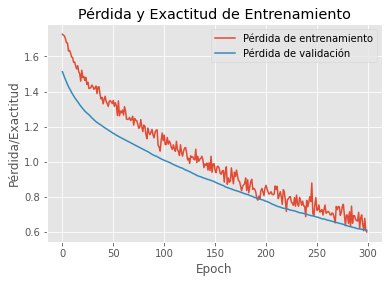

In [45]:
fig, ax = plt.subplots()
plt.style.use('ggplot')

epoch_values = list(range(len(history.history['loss'])))
ax.plot(epoch_values, history.history['loss'], label='Pérdida de entrenamiento')
ax.plot(epoch_values, history.history['val_loss'], label='Pérdida de validación')

ax.set_title('Pérdida y Exactitud de Entrenamiento')
ax.set_xlabel('Epoch')
ax.set_ylabel('Pérdida/Exactitud')
ax.legend()
plt.show()


#### Cargar los modelos

In [46]:
model_10 = load_model(os.path.join('res', 'model_1.h5'))
model_20 = load_model(os.path.join('res', 'model_2.h5'))
model_30 = load_model(os.path.join('res', 'model_3.h5'))
model_40 = load_model(os.path.join('res', 'model_4.h5'))
model_50 = load_model(os.path.join('res', 'model_5.h5'))


In [47]:
row = data.iloc[0, :-1].tolist()
y_pred = model_20.predict([row])
set_printoptions(precision=3)
print(f'Predicted: {y_pred} (class={argmax(y_pred)})')


1/1 [==============================] - 0s 87ms/step
Predicted: [[5.802e-01 4.036e-01 7.505e-03 4.406e-04 5.692e-03 2.572e-03]] (class=0)


## Conclusión


Comparando los resultados obtenidos con los diferentes modelos de Machine Learning podemos concluir que el de Árbol de Decisión es el que mejores predicciones consigue.

En cuanto a los modelos de Deep Learning, podemos comprobar que cuantos más complejos son, se reduce la precisión de estos, siendo el modelo 1 el que consigue mayor Accuracy.
